In [1]:
# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 그래디언트 소실과 폭주 문제

그래디언트 소실 : 역전파가 진행되면서 그래디언트가 점차 약해져서 아래쪽(입력층 쪽)에는 아무것도 전파되지 않는 문제

그래디언트 폭주 : 그래디언트가 점점 커져서 비정상적으로 큰 가중치로 갱신되는 문제

아래는 이 문제를 해결하기 위한 활성화 함수 및 기법들

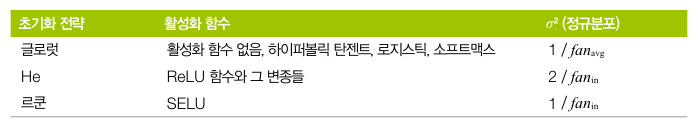

# 수렴하지 않는 활성화 함수

ReLU의 경우 죽은 ReLU(dying ReLU)문제가 있음. 훈련하는 동안 이부 뉴런이 0이외의 값을 출력하지 못하는 상황

이 문제를 해결하기 위해 LeakyRelu 사용

하이퍼파라미터 a가 새는(leaky)정도를 결정. 일반적으로 0.01

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6217 - accuracy: 0.7945 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5338 - accuracy: 0.8224 - val_loss: 0.5156 - val_accuracy:

In [11]:
#PReLU

tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8197 - accuracy: 0.7355 - val_loss: 0.7305 - val_accuracy: 0.7630
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6965 - accuracy: 0.7694 - val_loss: 0.6564 - val_accuracy: 0.7882
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6330 - accuracy: 0.7909 - val_loss: 0.6003 - val_accuracy: 0.8048
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5917 - accuracy: 0.8056 - val_loss: 0.5656 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5618 - accuracy: 0.8133 - val_loss: 0.5406 - val_accuracy: 0.8236
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5390 - accuracy: 0.8205 - val_loss: 0.5196 - val_accuracy:

# ELU

In [14]:
def elu(x, alpha = 1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

그림 저장: elu_plot


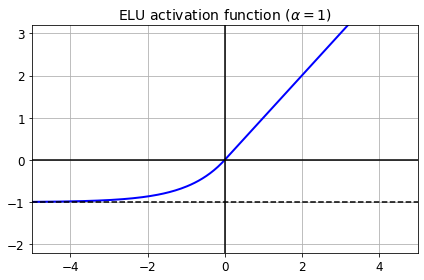

In [15]:
z = np.linspace(-5, 5, 200)

plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [16]:
#elu

tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.1201 - accuracy: 0.6462 - val_loss: 0.7927 - val_accuracy: 0.7376
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7228 - accuracy: 0.7570 - val_loss: 0.6571 - val_accuracy: 0.7822
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6316 - accuracy: 0.7878 - val_loss: 0.5999 - val_accuracy: 0.8022
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5824 - accuracy: 0.8044 - val_loss: 0.5562 - val_accuracy: 0.8216
Epoch 5/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5508 - accuracy: 0.8149 - val_loss: 0.5306 - val_accuracy: 0.8268
Epoch 6/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5281 - accuracy: 0.8201 - val_loss: 0.5113 - val_accuracy: 0.8294
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5108 - accuracy: 0.8253 - val_loss: 0.4957 - val_accuracy:

다른 모든 ReLU 변종보다 성능이 높음, 훈련 시간이 줄고 신경망의 테스트 세트 성능도 높음

훈련은 빠르나 단점으로 계산이 느림.

# SELU

ELU의 변종

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [21]:
#SELU는 반드시 모든 입력을 평균 0과 표준편차 1로 변경해야 함

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [22]:
history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 19s 11ms/step - loss: 1.3713 - accuracy: 0.4687 - val_loss: 0.9437 - val_accuracy: 0.6360
Epoch 2/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.8343 - accuracy: 0.6928 - val_loss: 0.9943 - val_accuracy: 0.6464
Epoch 3/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.6983 - accuracy: 0.7458 - val_loss: 0.6822 - val_accuracy: 0.7624
Epoch 4/10
1719/1719 [==============================] - 18s 11ms/step - loss: 0.6252 - accuracy: 0.7700 - val_loss: 0.6009 - val_accuracy: 0.7784
Epoch 5/10
1719/1719 [==============================] - 18s 11ms/step - loss: 0.5783 - accuracy: 0.7847 - val_loss: 0.5523 - val_accuracy: 0.7996
Epoch 6/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.5478 - accuracy: 0.8006 - val_loss: 0.5183 - val_accuracy: 0.8112
Epoch 7/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.5228 - accuracy: 0.8112 - val_loss: 0.5295 -

심층 신경망의 은칙층에 써야할 활성화 함수

SELU > ELU > LeakyReLU > ReLU > hanh > 시그모이드

네트워크가 자기 정규화되지 못한다면(와이드 & 딥 네트워크, 순환신경망 등) ELU

실행 속도가 중요하다면 LeakyReLU

속도가 중요하다면 ReLU

# 배치 정규화

모든 심층 신경망에서 배치 정규화가 성능을 크게 향샹시킴

그래디언트 소실 문제가 크게 감소하기 때문에 하이퍼볼릭 탄젠트나 시그모이드 같은 수렴성을 가진 활성화 함수 사용가능

규제와 같은 역할 수행

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),           #배치 정규화
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),           #배치 정규화
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),           #배치 정규화
    keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.summary()

#입력마다 4개의 파라미터를 추가하므로 첫 번째 배치 정규화 층의 파라미터 개수는 784 * 4 = 3136

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_116 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_117 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_118 (Dense)            (None, 10)               

In [26]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

#2개의 파라미터는 역전파로 훈련됨

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [27]:
bn1.updates

#각 에포크마다 호출된 2개의 업데이트 연산

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [29]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

#그냥 leakyReLU, ELU를 사용했을 때 보다 성능이 높음.

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8750 - accuracy: 0.7123 - val_loss: 0.5526 - val_accuracy: 0.8230
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5753 - accuracy: 0.8031 - val_loss: 0.4724 - val_accuracy: 0.8468
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5190 - accuracy: 0.8205 - val_loss: 0.4375 - val_accuracy: 0.8556
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4827 - accuracy: 0.8324 - val_loss: 0.4152 - val_accuracy: 0.8606
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4565 - accuracy: 0.8407 - val_loss: 0.3997 - val_accuracy: 0.8632
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4397 - accuracy: 0.8472 - val_loss: 0.3867 - val_accuracy: 0.8692
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4242 - accuracy: 0.8514 - val_loss: 0.3763 - val_accuracy:

In [30]:
#활성화 함수 전에 배치 정규화를 실행할 수도 있음(성능은 그때그때 다를 수 있음)
#배치 정규화 이전의 층은 편향이 필요 없으므로 편향을 제거해야

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False), #편향 제거
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False), #편향 제거
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

#활성화 함수 다음에 배치 정규화를 실행한 것 보다 성능이 떨어짐

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0317 - accuracy: 0.6757 - val_loss: 0.6767 - val_accuracy: 0.7810
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6790 - accuracy: 0.7792 - val_loss: 0.5566 - val_accuracy: 0.8182
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5960 - accuracy: 0.8037 - val_loss: 0.5007 - val_accuracy: 0.8360
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5447 - accuracy: 0.8190 - val_loss: 0.4666 - val_accuracy: 0.8448
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5109 - accuracy: 0.8279 - val_loss: 0.4434 - val_accuracy: 0.8532
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4898 - accuracy: 0.8337 - val_loss: 0.4263 - val_accuracy: 0.8548
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4712 - accuracy: 0.8396 - val_loss: 0.4130 - val_accuracy:

배치 정규화(keras.layers.BatchNormalization)는 심층 심경망에서 매우 널리 사용

일반적으로 모든 층 위에 배치 정규화가 있다고 가정.

# 그래디언트 클리핑

순환 신경망 같이 배치 정규화 적용이 어려운 경우 적용

그래디언트 벡터(가중치 및 편향의 기울기 값)의 모든 원소를 -1.0과 1.0 사이의 값으로 잘라내기

케라스의 모든 옵티마이저는 clipnorm, clipvalue매개변수 지원(1.0으로 설정)

# 훈련된 층 재사용

비슷한 유형의 문제를 처리한 DNN(심층 신경망)의 하위층(입력층에 가까운 쪽)을 재사용 : 전이 학습

작업이 비슷할 수록 더 많은 층을 재사용 가능.

매우 비슷하다면 출력층만 재사용 가능

In [33]:
def split_dataset(X, y):
    y_5_or_y_6 = (y == 5) | (y == 6) #샌들, 셔츠만
    y_A = y[~y_5_or_y_6]#샌들, 셔츠를 제외한 모든 것
    y_A[y_A > 6] -= 2 #7, 8, 9에 해당하는 것들을 5, 6, 7로 만들어서 연속적으로 구성
    y_B = (y[y_5_or_y_6] == 6).astype(np.float32) #5, 6에 해당하는 레이블을 0, 1로 구성(이진 분류)
    return (
        (X[~y_5_or_y_6], y_A), #샌들(5), 셔츠(6)을 제외한 모든 세트
        (X[y_5_or_y_6], y_B) #샌들, 셔츠에 대한 이진 분류 세트
    )

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)

X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [34]:
X_train_A.shape, X_train_B.shape

((43986, 28, 28), (200, 28, 28))

In [37]:
X_train_A[0], X_train_B[0] #0-1사이의 값으로 정규화 되어 있음.

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.00392157,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
         0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.16470588,
         0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
         0.

In [35]:
y_train_A[:10], y_train_B[:10]

(array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4], dtype=uint8),
 array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0.], dtype=float32))

In [36]:
tf.random.set_seed(42)
np.random.seed(42)

In [38]:
model_A = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28])
])

for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
    
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [39]:
model_A.compile(loss="sparse_categorical_crossentropy",
               optimizer=keras.optimizers.SGD(learning_rate=1e-3),
               metrics=["accuracy"])

In [40]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                     validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.5926 - accuracy: 0.8104 - val_loss: 0.3896 - val_accuracy: 0.8662
Epoch 2/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3289 - val_accuracy: 0.8827
Epoch 3/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3170 - accuracy: 0.8895 - val_loss: 0.3014 - val_accuracy: 0.8979
Epoch 4/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2973 - accuracy: 0.8973 - val_loss: 0.2894 - val_accuracy: 0.9026
Epoch 5/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2835 - accuracy: 0.9021 - val_loss: 0.2774 - val_accuracy: 0.9063
Epoch 6/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2730 - accuracy: 0.9061 - val_loss: 0.2733 - val_accuracy: 0.9071
Epoch 7/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2641 - accuracy: 0.9092 - val_loss: 0.2717 - val_accuracy:

In [41]:
model_A.save("my_model_A.h5")

In [42]:
model_B = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28])
])

for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
    
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [43]:
model_B.compile(loss="binary_crossentropy",
               optimizer=keras.optimizers.SGD(learning_rate=1e-3),
               metrics=["accuracy"])

In [44]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                     validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 23ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 10ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 10ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 10ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 11ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [45]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_119 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_120 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)              

In [101]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1]) #출력층만 빼고 재사용
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid")) #이진 분류 출력층 추가

In [102]:
model_A_clone = keras.models.clone_model(model_A) #현재 model_A와 model_B_on_A는 모델을 공유하므로, 기존 모델 백업
model_A_clone.set_weights(model_A.get_weights())

In [103]:
#기존에 훈련된 부분을 제외하고 새로 추가된 출력층은 현재 랜덤하게 초기화 된 상태 -> 큰 오차 발생
#기존 부분을 동결하고 새로 추가된 부분에 대해 적절한 가중치를 학습할 수 있게 훈련

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
    
model_B_on_A.compile(loss="binary_crossentropy",
                    optimizer = keras.optimizers.SGD(learning_rate=1e-3),
                    metrics=["accuracy"])

In [104]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=10,
                          validation_data=(X_valid_B, y_valid_B))

Epoch 1/10
7/7 [==============================] - 0s 22ms/step - loss: 1.5884 - accuracy: 0.2800 - val_loss: 1.5055 - val_accuracy: 0.3458
Epoch 2/10
7/7 [==============================] - 0s 9ms/step - loss: 1.4669 - accuracy: 0.3150 - val_loss: 1.3909 - val_accuracy: 0.3793
Epoch 3/10
7/7 [==============================] - 0s 9ms/step - loss: 1.3495 - accuracy: 0.3350 - val_loss: 1.2867 - val_accuracy: 0.3976
Epoch 4/10
7/7 [==============================] - 0s 9ms/step - loss: 1.2434 - accuracy: 0.3600 - val_loss: 1.1938 - val_accuracy: 0.4199
Epoch 5/10
7/7 [==============================] - 0s 9ms/step - loss: 1.1492 - accuracy: 0.4000 - val_loss: 1.1083 - val_accuracy: 0.4402
Epoch 6/10
7/7 [==============================] - 0s 9ms/step - loss: 1.0628 - accuracy: 0.4550 - val_loss: 1.0290 - val_accuracy: 0.4635
Epoch 7/10
7/7 [==============================] - 0s 9ms/step - loss: 0.9832 - accuracy: 0.4900 - val_loss: 0.9591 - val_accuracy: 0.4777
Epoch 8/10
7/7 [=================

In [105]:
#재사용하는 층의 동결 해제

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 0s 23ms/step - loss: 0.6125 - accuracy: 0.6550 - val_loss: 0.4624 - val_accuracy: 0.7738
Epoch 2/16
7/7 [==============================] - 0s 10ms/step - loss: 0.3696 - accuracy: 0.8200 - val_loss: 0.3147 - val_accuracy: 0.8905
Epoch 3/16
7/7 [==============================] - 0s 10ms/step - loss: 0.2553 - accuracy: 0.9150 - val_loss: 0.2367 - val_accuracy: 0.9371
Epoch 4/16
7/7 [==============================] - 0s 11ms/step - loss: 0.1917 - accuracy: 0.9500 - val_loss: 0.1908 - val_accuracy: 0.9513
Epoch 5/16
7/7 [==============================] - 0s 10ms/step - loss: 0.1532 - accuracy: 0.9600 - val_loss: 0.1612 - val_accuracy: 0.9604
Epoch 6/16
7/7 [==============================] - 0s 9ms/step - loss: 0.1280 - accuracy: 0.9750 - val_loss: 0.1409 - val_accuracy: 0.9665
Epoch 7/16
7/7 [==============================] - 0s 9ms/step - loss: 0.1102 - accuracy: 0.9850 - val_loss: 0.1261 - val_accuracy: 0.9686
Epoch 8/16
7/7 [=============

In [106]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 910us/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [107]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 905us/step - loss: 0.0626 - accuracy: 0.9935


[0.06260646879673004, 0.9934999942779541]

In [87]:
#이미 훈련된 모델A를 재사용한 모델이 오차율이 4.5배 감소

(100 - 97.05) / (100 - 99.35)

4.538461538461503

전이학습은 작은 네트워크에서는 잘 동작하지 않음

전이학습은 좀 더 일반적인 특성을 감지하는 경향이 있는 CNN(심층 합성곱 신경망)에서 잘 동작

# 비지도 사전훈련

재사용할 수 있는 모델이 없으며, 레이블된 훈련 데이터 비율이 적을 경우 오토인코더나 GAN을 사용한 비지도 사전 훈련

ex: 얼굴 인식 시스템 -> 무작위로 많은 인물 사진을 수집해서 두 개의 이미지가 같은 사람인지 감지하는 신경망 훈련 -> 얼굴의 특성을 잘 인지하도록 훈련됨 -> 하위층을 재사용해서 적은 양의 훈련 데이터에서 얼굴을 잘 구분하는 분류기 훈련

# 고속 옵티마이저

훈련 속도를 높이는 방법
1. 연결 가중치에 좋은 초기화 전략 사용하기
2. 좋은 활성화 함수 사용하기
3. 배치 정규화 사용
4. 사전 훈련된 네트워크의 일부 재사용

확률적 경사하강법 보다 더 빠른 옵티마이저 사용하기

### 모멘텀 최적화 - 지역 최적점을 건너뛰도록 해줌

optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

보통 모멘텀 0.9에서 잘 작동하며 경사하강법 보다 항상 더 빠름

### NAG(네스테로프 가속 경사) - 모멘텀 최적화 보다 빠름

optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

### AdaGrad(아다그라드 - 적응적 학습률), 심층 신경망에는 사용 금지

### ADAM(적응적 모멘트 추정)

optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

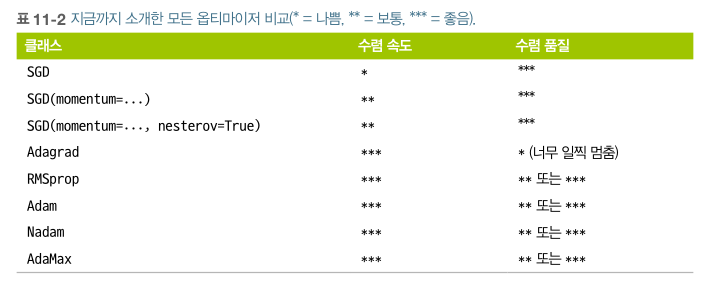

# 학습률 스케쥴링

훈련하는 동안 학습률을 감소시키는 전략 - 학습률 스케쥴

### 거듭제곱 스케쥴링

In [110]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [111]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [112]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4875 - accuracy: 0.8287 - val_loss: 0.4068 - val_accuracy: 0.8602
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3781 - accuracy: 0.8667 - val_loss: 0.3769 - val_accuracy: 0.8700
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3448 - accuracy: 0.8775 - val_loss: 0.3760 - val_accuracy: 0.8708
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3228 - accuracy: 0.8852 - val_loss: 0.3544 - val_accuracy: 0.8780
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3075 - accuracy: 0.8908 - val_loss: 0.3458 - val_accuracy: 0.8796
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2934 - accuracy: 0.8960 - val_loss: 0.3447 - val_accuracy: 0.8826
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.8993 - val_loss: 0.3410 - val_accuracy:

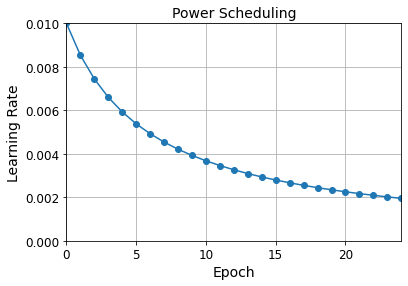

In [113]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### 지수 기반 스케쥴링

In [114]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [115]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [116]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [117]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8425 - accuracy: 0.7552 - val_loss: 0.8323 - val_accuracy: 0.7160 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6856 - accuracy: 0.7947 - val_loss: 0.6068 - val_accuracy: 0.8288 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6658 - accuracy: 0.8058 - val_loss: 0.7049 - val_accuracy: 0.7878 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5353 - accuracy: 0.8375 - val_loss: 0.5738 - val_accuracy: 0.8290 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5000 - accuracy: 0.8487 - val_loss: 0.5293 - val_accuracy: 0.8596 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4446 - accuracy: 0.8626 - val_loss: 0.5236 - val_accuracy: 0.8622 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 5s

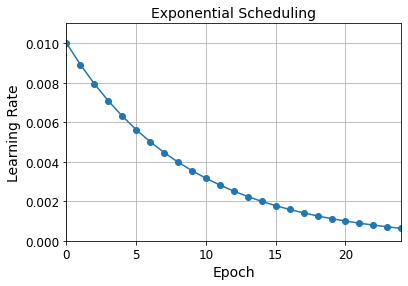

In [118]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### 기간별 고정 스케쥴링

In [119]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [120]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [121]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8284 - accuracy: 0.7611 - val_loss: 0.8247 - val_accuracy: 0.7480 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8300 - accuracy: 0.7618 - val_loss: 0.8837 - val_accuracy: 0.7884 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9441 - accuracy: 0.7289 - val_loss: 1.3046 - val_accuracy: 0.6480 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9383 - accuracy: 0.7264 - val_loss: 0.8370 - val_accuracy: 0.7892 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9779 - accuracy: 0.7078 - val_loss: 1.0102 - val_accuracy: 0.6620 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7379 - accuracy: 0.7309 - val_loss: 0.9029 - val_accuracy: 0.7500 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 5s

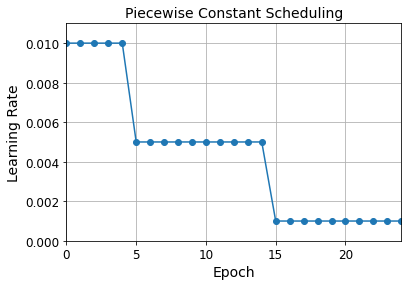

In [122]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### 1 사이클 스케쥴링

In [123]:

K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [124]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.3912


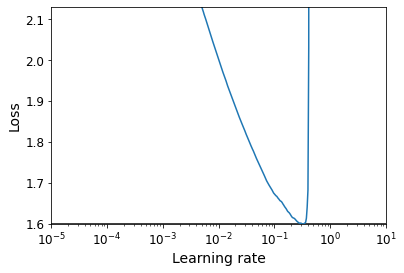

In [125]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [126]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [127]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 1s 3ms/step - loss: 0.6572 - accuracy: 0.7740 - val_loss: 0.4872 - val_accuracy: 0.8338
Epoch 2/25
430/430 [==============================] - 1s 3ms/step - loss: 0.4580 - accuracy: 0.8397 - val_loss: 0.4275 - val_accuracy: 0.8520
Epoch 3/25
430/430 [==============================] - 1s 3ms/step - loss: 0.4121 - accuracy: 0.8548 - val_loss: 0.4116 - val_accuracy: 0.8590
Epoch 4/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3837 - accuracy: 0.8640 - val_loss: 0.3869 - val_accuracy: 0.8684
Epoch 5/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3639 - accuracy: 0.8717 - val_loss: 0.3769 - val_accuracy: 0.8682
Epoch 6/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3456 - accuracy: 0.8775 - val_loss: 0.3745 - val_accuracy: 0.8716
Epoch 7/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3330 - accuracy: 0.8812 - val_loss: 0.3635 - val_accuracy: 0.8722
Epoch 

지수 기반 스케쥴링, 성능 기반 스케쥴링, 1사이클 스케쥴링이 수렴 속도를 크게 높일 수 있음

# 규제를 사용해 과대적합 피하기

### l1과 l2 규제

l2 : 신경망의 연결 가중치 제한

l1 : 많은 가중치가 0인 회소 모델 만들기

In [129]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 5s 3ms/step - loss: 1.6223 - accuracy: 0.8109 - val_loss: 0.7201 - val_accuracy: 0.8306
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7204 - accuracy: 0.8269 - val_loss: 0.6843 - val_accuracy: 0.8368


### 드롭 아웃

드롭 아웃으로 훈련된 뉴련은 이웃한 뉴런에 맞추어 적응될 수 없으며, 자기 자신이 유용해져야 함.

몇 개의 입력에 의존할 수 없으며, 모든 입력 뉴런에 주의를 기울여야 함

일반적으로 출력층을 제외한 맨 위의 층 부터 세번째 층까지 드롭 아웃 적용

In [131]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5597 - accuracy: 0.8059 - val_loss: 0.3672 - val_accuracy: 0.8652
Epoch 2/2
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4229 - accuracy: 0.8452 - val_loss: 0.3460 - val_accuracy: 0.8696


### 알파 드롭 아웃

SELU 활성화 함수를 기반으로 하는 경우

In [132]:
tf.random.set_seed(42)
np.random.seed(42)

In [133]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6653 - accuracy: 0.7592 - val_loss: 0.5920 - val_accuracy: 0.8424
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5607 - accuracy: 0.7935 - val_loss: 0.5573 - val_accuracy: 0.8402
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5284 - accuracy: 0.8055 - val_loss: 0.4852 - val_accuracy: 0.8586
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5072 - accuracy: 0.8121 - val_loss: 0.4595 - val_accuracy: 0.8608
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4922 - accuracy: 0.8183 - val_loss: 0.4695 - val_accuracy: 0.8552
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4862 - accuracy: 0.8190 - val_loss: 0.4752 - val_accuracy: 0.8590
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4718 - accuracy: 0.8247 - val_loss: 0.4689 - val_accuracy:

### MC드롭아웃(몬테 카를로)

훈련된 드롭아웃 모델을 재훈련하거나 수정하지 않고 성능을 향상 시킬 수 있음

In [134]:
y_probas = np.stack([model(X_test_scaled, training=True) #training=True로 드롭아웃층 활성화하고 100번 예측 수행
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0) #행 방향으로 쌓인 예측 결과에 대해 평균
y_std = y_probas.std(axis=0)

#드롭아웃으로 만든 에측을 평균하면 일반적으로 드롭아웃이 없이 예측한 것 보다 안정적

In [145]:
# 드롭아웃을 끄고 모델 예측

np.round(model.predict(X_test_scaled[:1]), 2) #X_test_scaled[:1] == X_test_scaled[0].reshape(1, 28, 28)

#9번 클래스(앵클 부츠)로 확신

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.02, 0.  , 0.95]],
      dtype=float32)

In [146]:
y_probas.shape 

#10000개의 테스트 세트와 10개의 클래스가 있으므로, 각각의 테스트 데이터에 대한 10개의 예측 * 100번 수행하여 스택

(100, 10000, 10)

In [147]:
# 드롭아웃의 예측

np.round(y_probas[:, :1], 2) #100개의 스택 전체에 대해서 각각 첫번째 테스트 데이터에 대한 예측

#예측이 9번 또는 5번, 7번 등으로 다양함.

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.43, 0.  , 0.39]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.37, 0.  , 0.46, 0.  , 0.17]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.32, 0.  , 0.65]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.49, 0.  , 0.24, 0.  , 0.28]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.33, 0.  , 0.67]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.62, 0.  , 0.06, 0.  , 0.32]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.03, 0.  , 0.91]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.29, 0.  , 0.67]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.86, 0.  , 0.04, 0.  , 0.1 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.84, 0.  , 0.08, 0.  , 0.07]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.47, 0.  , 0.2 , 0.  , 0.33]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.  , 0.06, 0.  , 0.66]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.35, 0.  , 0.03, 0.  , 0.61]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.32, 0.  , 0.01, 0.  , 0

In [148]:
#스택 차원에 대해 평균을 내면

np.round(y_proba[:1], 2)

# 클래스9에 속한다고 52% 확신 -> 95%보다는 훨씬 납득할 만한 값

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.3 , 0.  , 0.17, 0.  , 0.52]],
      dtype=float32)

In [149]:
# 확률 추정의 분포 확인

np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.27, 0.  , 0.16, 0.  , 0.28]],
      dtype=float32)

In [151]:
# 모델에 배치 정규화(BatchNormalization)이 포함되어 있다면 훈련 모드를 바꾸면 안되고 다음 클래스 사용

class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [ ]:
#기존 모델에서 AlphaDropout -> MCAlphaDropout으로 교체

tf.random.set_seed(42)
np.random.seed(42)

In [152]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [153]:
mc_model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_163 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_164 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_165 (Dense)            (None, 10)              

In [154]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [155]:
mc_model.set_weights(model.get_weights())

In [156]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.3 , 0.  , 0.23, 0.  , 0.47]],
      dtype=float32)

### 대부분의 경우에 적용가능한 DNN 설정

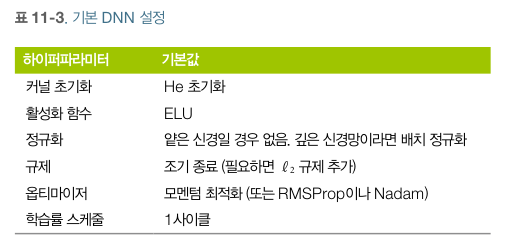

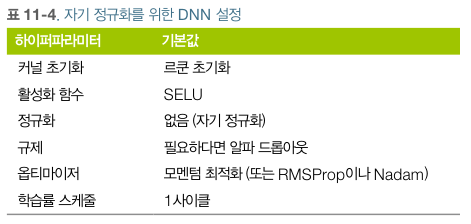

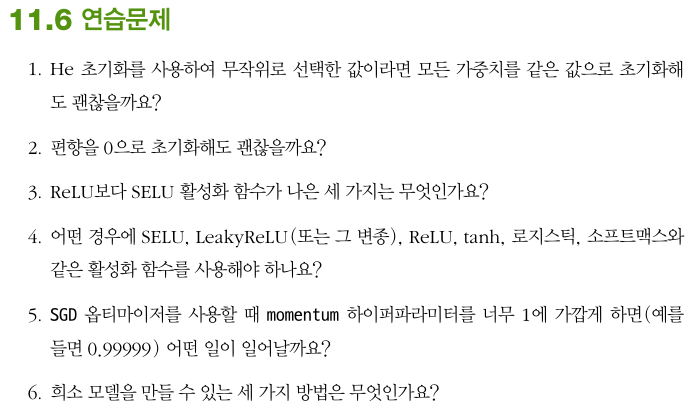
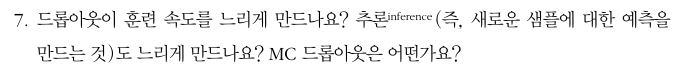

1. No. 모든 가중치는 독립적으로 샘플링 되어야 한다. 무작위로 샘플링해서 대칭성을 피하기 위함.


2. 상관 없음. 초기화 방법에는 차이가 없음.


3. 음수를 받을 수 있으므로 뉴런의 평균 출력이 ReLU보다 0에 더 가까움. 그래디언트 소실 문제 완화  
   도함수의 값이 항상 0이 아니라서 죽은 뉴런 현상 없음  
   모델이 자기 정규화 되어 그래디언트 폭주, 소실 문제 해결 가능
   
   
4. SELU가 기본 값으로 좋음.  
   가능한 빠른 신경망의 경우 LeakyReLU  
   ReLU는 간단하기 때문에 많이 선호  
   하이퍼볼릭 탄젠트(tanh)는 -1 ~ 1사이의 값이 가지는 출력층에 사용  
   로지스틱(시그모이드)는 확률 추정시(ex: 이진 분류) - 출력층
   소프트맥스는 상호 배타적인 클래스에 대한 확률 출력 - 출력층
   
   
5. 최소값을 지나쳤다가 돌아오는 것의 반복, 작은 값을 사용했을 때 보다 수렴하는데 훨씬 오래 걸림


6. l1 규제 사용  
   모델 훈련 후 작은 가중치를 0으로 만들기  
   텐서플로우 모델 최적화 도구 사용
   
   
7. 훈련 속도를 느리게 만듬.(대략 두배 정도)  
   예측 속도에는 영향 없음  
   MC드롭아웃의 경우 훈련 속도는 같음  
   예측시 속도가 느려짐(10배 이상 예측 수행하여 평균을 내므로)

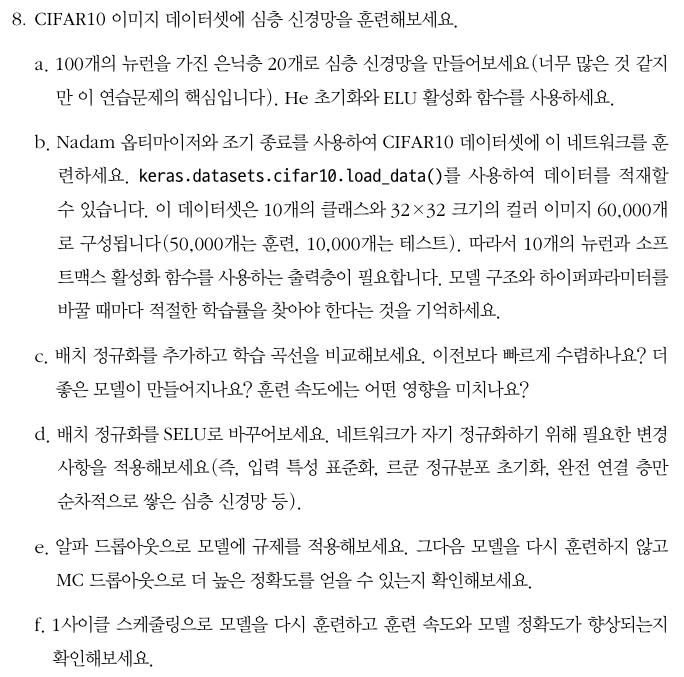

In [158]:
# 연습문제 8 - CIFAR10 이미지 데이터셋에 심층 신경망 훈련
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
n_hidden = 20

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3])
])

for _ in range(n_hidden):
    model.add(
        keras.layers.Dense(            
            100, 
            activation="elu", 
            kernel_initializer="he_normal"))

In [159]:
# 출력층 추가

model.add(keras.layers.Dense(10, activation="softmax"))

In [160]:
#학습률 5e-5인 Nadam 옵티바이저 사용
#학습률은 1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3, 3e-3 중에 에포크 20 후에 검증 세트 성능이 제일 좋은 걸 선택
optimizer = keras.optimizers.Nadam(learning_rate=5e-5) 
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
              metrics=["accuracy"])

In [2]:
#데이터 셋 로드 및 검증 세트 분리
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [162]:
X_train.shape, X_train[0]

((45000, 32, 32, 3),
 array([[[ 60,  82,  54],
         [ 40,  68,  36],
         [ 52,  81,  52],
         ...,
         [ 53,  43,  50],
         [ 66,  55,  61],
         [ 73,  62,  68]],
 
        [[112, 114, 114],
         [ 58,  71,  56],
         [ 58,  81,  53],
         ...,
         [ 54,  47,  53],
         [ 67,  58,  65],
         [ 72,  62,  69]],
 
        [[170, 161, 178],
         [119, 118, 120],
         [ 80,  89,  74],
         ...,
         [ 56,  50,  56],
         [ 70,  63,  70],
         [ 72,  64,  71]],
 
        ...,
 
        [[ 91, 113,  94],
         [ 59,  83,  62],
         [ 45,  65,  45],
         ...,
         [ 32,  56,  30],
         [ 26,  46,  26],
         [ 25,  42,  23]],
 
        [[ 99, 119, 102],
         [ 64,  86,  67],
         [ 55,  75,  55],
         ...,
         [ 42,  71,  39],
         [ 42,  68,  37],
         [ 40,  64,  32]],
 
        [[105, 122, 108],
         [ 70,  92,  74],
         [ 59,  79,  60],
         ...,
       

In [163]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1 #모델 훈련때 마다 증가시킴
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [
    early_stopping_cb,
    model_checkpoint_cb,
    tensorboard_cb
]

In [165]:
%tensorboard --logdir=./my_cifar10_logs --port=6006

Reusing TensorBoard on port 6006 (pid 2260), started 0:00:45 ago. (Use '!kill 2260' to kill it.)

In [166]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 9s 7ms/step - loss: 4.0646 - accuracy: 0.1702 - val_loss: 2.1317 - val_accuracy: 0.2358
Epoch 2/100
1407/1407 [==============================] - 9s 6ms/step - loss: 2.0443 - accuracy: 0.2549 - val_loss: 2.0609 - val_accuracy: 0.2504
Epoch 3/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9230 - accuracy: 0.2960 - val_loss: 1.9954 - val_accuracy: 0.2706
Epoch 4/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8407 - accuracy: 0.3274 - val_loss: 1.8433 - val_accuracy: 0.3388
Epoch 5/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7839 - accuracy: 0.3468 - val_loss: 1.7957 - val_accuracy: 0.3438
Epoch 6/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7375 - accuracy: 0.3709 - val_loss: 1.8352 - val_accuracy: 0.3418
Epoch 7/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6966 - accuracy: 0.3828 - val_loss: 1.7427 - val_ac

In [167]:
#배치 정규화 추가

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

#학습률은 1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3, 3e-3 중에 에포크 20 후에 검증 세트 성능이 제일 좋은 걸 선택
optimizer = keras.optimizers.Nadam(lr=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1 # 모델을 훈련할 때마다 증가시킴
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.8439 - accuracy: 0.3407 - val_loss: 1.6815 - val_accuracy: 0.4038
Epoch 2/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.6706 - accuracy: 0.4040 - val_loss: 1.5858 - val_accuracy: 0.4322
Epoch 3/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.6050 - accuracy: 0.4288 - val_loss: 1.5552 - val_accuracy: 0.4422
Epoch 4/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.5541 - accuracy: 0.4462 - val_loss: 1.5626 - val_accuracy: 0.4470
Epoch 5/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5099 - accuracy: 0.4641 - val_loss: 1.4501 - val_accuracy: 0.4770
Epoch 6/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.4711 - accuracy: 0.4777 - val_loss: 1.4182 - val_accuracy: 0.4886
Epoch 7/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4385 - accuracy: 0.4878 - val_loss: 1

[1.3191810846328735, 0.5383999943733215]

에포크는 배치 정규화 사용 전보다 56 -> 44로 12에포크 줄었지만, 실행시간은 504초  -> 704초로 늘어남.... 이거 뭐여...-_-

근데 정확도는 48% -> 53.2%로 많이 향상됨

In [168]:
# 배치 정규화를 SELU로 바꿔서 수행

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20): #완전 연결층만 순차적으로 쌓은 심층신경망
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal", #르쿤 정규분포 초기화
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1 # 모델을 훈련할 때마다 증가시킴
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

#입력 특성 표준화------------------------------------------------------------------------------------
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 13s 10ms/step - loss: 1.9358 - accuracy: 0.3049 - val_loss: 1.8237 - val_accuracy: 0.3426
Epoch 2/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7137 - accuracy: 0.3865 - val_loss: 1.7676 - val_accuracy: 0.3502
Epoch 3/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6199 - accuracy: 0.4270 - val_loss: 1.6484 - val_accuracy: 0.4198
Epoch 4/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5521 - accuracy: 0.4493 - val_loss: 1.7624 - val_accuracy: 0.3920
Epoch 5/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4962 - accuracy: 0.4746 - val_loss: 1.6000 - val_accuracy: 0.4374
Epoch 6/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.4479 - accuracy: 0.4912 - val_loss: 1.5106 - val_accuracy: 0.4676
Epoch 7/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4042 - accuracy: 0.5091 - val_loss: 1.5580 - val_

[1.4730284214019775, 0.5023999810218811]

정확도가 50.7%로 원래 모델보다는 좋지만 배치 정규화 모델 보다는 좋지 않음.

에포크가 34고 총 걸린 시간은 306초로 가장 빠름

In [169]:
#SELU + 알파 드롭아웃

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.h5", save_best_only=True)
run_index = 1 # 모델을 훈련할 때마다 증가시킴
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.8989 - accuracy: 0.3252 - val_loss: 1.7365 - val_accuracy: 0.3802
Epoch 2/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6701 - accuracy: 0.4097 - val_loss: 1.6835 - val_accuracy: 0.3978
Epoch 3/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5776 - accuracy: 0.4465 - val_loss: 1.6348 - val_accuracy: 0.4208
Epoch 4/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5038 - accuracy: 0.4689 - val_loss: 1.6170 - val_accuracy: 0.4370
Epoch 5/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4465 - accuracy: 0.4928 - val_loss: 1.6551 - val_accuracy: 0.4580
Epoch 6/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3969 - accuracy: 0.5101 - val_loss: 1.5017 - val_accuracy: 0.4898
Epoch 7/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3569 - accuracy: 0.5276 - val_loss: 1.5140 - val_a

[1.4791529178619385, 0.5016000270843506]

검증 세트에서 51%의 정확도

In [170]:
#MC 드롭 아웃 적용

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [171]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [172]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [173]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

0.4996

정확도 향상이 없음.

지금까지 가장 좋은 모델은 배치 정규화 모델

In [174]:
# 1사이클 스케쥴링

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(lr=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

352/352 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.1419


(9.999999747378752e-06,
 9.999868392944336,
 2.604417085647583,
 4.000283479690552)

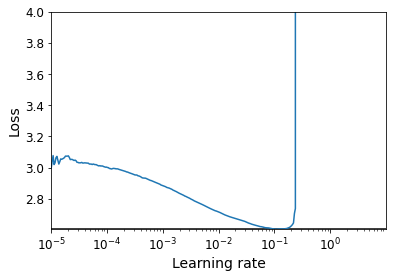

In [175]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [176]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(lr=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [177]:
n_epochs = 15
onecycle = OneCycleScheduler(len(X_train_scaled) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 3s 9ms/step - loss: 2.0523 - accuracy: 0.2868 - val_loss: 1.8003 - val_accuracy: 0.3636
Epoch 2/15
352/352 [==============================] - 3s 9ms/step - loss: 1.7613 - accuracy: 0.3791 - val_loss: 1.6175 - val_accuracy: 0.4312
Epoch 3/15
352/352 [==============================] - 3s 9ms/step - loss: 1.6207 - accuracy: 0.4246 - val_loss: 1.7202 - val_accuracy: 0.4128
Epoch 4/15
352/352 [==============================] - 3s 8ms/step - loss: 1.5390 - accuracy: 0.4562 - val_loss: 1.6224 - val_accuracy: 0.4322
Epoch 5/15
352/352 [==============================] - 3s 8ms/step - loss: 1.4851 - accuracy: 0.4737 - val_loss: 1.6074 - val_accuracy: 0.4498
Epoch 6/15
352/352 [==============================] - 3s 9ms/step - loss: 1.4435 - accuracy: 0.4871 - val_loss: 1.5557 - val_accuracy: 0.4590
Epoch 7/15
352/352 [==============================] - 3s 8ms/step - loss: 1.4087 - accuracy: 0.4982 - val_loss: 1.5817 - val_accuracy: 0.4576
Epoch 

각 에포크는 3초 정도 걸림, 가장 빠름. 배치정규화 504초 -> 45초

배치 정규화보다는 못하지만 검증 세트에서 52.3% 성능